In [2]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Sonis\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [36]:
# Function to remove any unnecessory small blobs
def remove_small_contours(rects):
    for i, (x,y,w,h) in enumerate(rects):
        if w*h < 100 :
            rects.pop(i)
    return rects

In [37]:
def label(one_hot_arr):
    labels = '+ - 0 1 2 3 4 5 6 7 8 9 / *'.split()
    index = np.argmax(one_hot_arr)
    return labels[index]

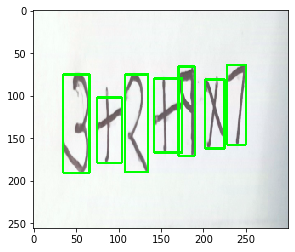

In [54]:
img = cv2.imread('scan.jpg')
img = cv2.resize(img, (300,256), interpolation=cv2.INTER_AREA)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# we use the image with black background so as to find the contours with ease so we use binary thresholding here
#we find contours and move ahead with solving the problem
_, threshInv = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)
_, thresh = cv2.threshold(gray,140, 255, cv2.THRESH_BINARY)
image,contours,hierarchy = cv2.findContours(threshInv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits = []

# Putting all the rectangle coordinates of the contours in a list and removing small contours
rects = []
for c in contours:
    rects.append(cv2.boundingRect(c))    
processed_contours = remove_small_contours(rects)
# sort the contours from left to right so that the model predicts the digtis/operators in order
sorted_contours = sorted(processed_contours)

for (x,y,w,h) in sorted_contours:
    # speical case for - sign. Pad top and bottom 
    if w>2*h:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        digit = thresh[y:y+h, x:x+w]
        padded_digit = np.pad(digit, ((15,15),(0,0)), mode='constant', constant_values=255)
        padded_digit = cv2.resize(padded_digit, (32,32), interpolation=cv2.INTER_AREA)
        
    else:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        # extract the digit
        digit = thresh[y:y+h, x:x+w]
        # pad some white pixels to the extracted image for better prediction results
        resized_digit = cv2.resize(digit, (26,26), interpolation=cv2.INTER_AREA)
        padded_digit = np.pad(resized_digit, ((3,3),(3,3)), mode='constant', constant_values=255)
    
    preprocessed_digits.append(padded_digit)

plt.imshow(img)
#plt.imshow(threshInv)
#cv2.waitKey(0)
#cv2.destroyAllWindows()


In [55]:
model_math = tf.keras.models.load_model("num_detect2nd.h5")

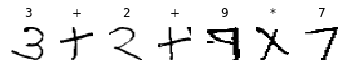

Result:  68


In [56]:
_, ax = plt.subplots(1, len(preprocessed_digits), figsize=(6,6))
res = []

for i in range (len(preprocessed_digits)):
    
    digit = preprocessed_digits[i]
    prediction = model_math.predict(digit.reshape(1,32,32,1))
    ax[i].imshow(digit, cmap ='gray')
    ax[i].set_title(label(prediction))
    ax[i].axis("off")
    res.append(label(prediction))
    
plt.show()
print("Result: ", eval("".join(res)))


In [ ]:
img1 = cv2.imread("imageclick.jpg")
img1 = cv2.resize(img1, (300,256))
gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)

# The images in the dataset have white background and black color for the digtis
# However its much more efficient to find contours on an image with BLACK BACKGROUND
# so we threshold the image in both BINARY(black img, white bg) and BINARY_INV(white img, black bg) and
# detect contours on "threshInv" and perform model prediction on "thresh"
_, threshInv1 = cv2.threshold(gray1, 120, 255, cv2.THRESH_BINARY_INV)
_, thresh1 = cv2.threshold(gray1,120, 255, cv2.THRESH_BINARY)
image,contours1,hierarchy = cv2.findContours(threshInv, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

preprocessed_digits1 = []

# Put all the rectangle coordinates of the contours in a list
rects1 = []
for c in contours:
    rects1.append(cv2.boundingRect(c))
    
# remove small blobs if any    
processed_contours = remove_small_contours(rects1)
# sort the contours from left to right so that the model predicts the digtis/operators in order
sorted_contours = sorted(processed_contours)

for (x,y,w,h) in sorted_contours:
    # speical case for - sign. Pad top and bottom 
    if w>2*h:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        digit = thresh[y:y+h, x:x+w]
        padded_digit = np.pad(digit, ((15,15),(0,0)), mode='constant', constant_values=255)
        padded_digit = cv2.resize(padded_digit, (32,32), interpolation=cv2.INTER_AREA)
        
    else:
        cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)
        # extract the digit
        digit = thresh[y:y+h, x:x+w]
        # pad some white pixels to the extracted image for better prediction results
        resized_digit = cv2.resize(digit, (26,26), interpolation=cv2.INTER_AREA)
        padded_digit = np.pad(resized_digit, ((3,3),(3,3)), mode='constant', constant_values=255)
    
    preprocessed_digits.append(padded_digit)

cv2.imshow("img", img)
cv2.imshow("threshInv", threshInv)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [ ]:
_, ax = plt.subplots(1, len(preprocessed_digits), figsize=(6,6))
res = []

for i in range (len(preprocessed_digits)):
    
    digit = preprocessed_digits[i]
    prediction = model_math.predict(digit.reshape(1,32,32,1))
    ax[i].imshow(digit, cmap ='gray')
    ax[i].set_title(label(prediction))
    ax[i].axis("off")
    res.append(label(prediction))
    
plt.show()
print("Result: ", eval("".join(res)))
